In [50]:
import pandas as pd
import numpy as np

In [28]:
covidIndia = pd.read_json('raw_data.json')

In [38]:
normalizedData = pd.json_normalize(covidIndia['raw_data'])

In [40]:
normalizedData.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [47]:
normalizedData['dateannounced'].count()

26498

In [63]:
unique, counts = np.unique(normalizedData['dateannounced'], return_counts = True)
date_count = np.asarray((unique, counts)).T

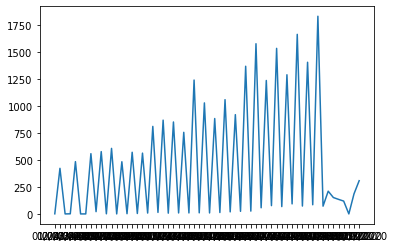

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(unique, counts)

In [84]:
import datetime as dt
unique = pd.to_datetime(unique)
unique = unique.map(dt.datetime.toordinal)

In [100]:
date_count = np.asarray((unique, counts)).T

In [192]:
def getDateVal(val):
    return (dt.datetime.toordinal(pd.to_datetime(val)))

In [91]:
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lin_reg = LinearRegression()

In [133]:
lin_reg.fit(date_count, counts)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [223]:
X_train, X_test, y_train, y_test = date_count[:50], date_count[50:], counts[:50], counts[50:]

In [224]:
shuffle_index = np.random.permutation(50)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [225]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=100000)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [231]:
sgd_clf.predict([[getDateVal('01/07/2020'), 90]])

array([1239])

In [232]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(date_count, counts)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [233]:
tree_reg.predict([[getDateVal('01/07/2020'), 90]])

array([94.])